## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 2.29279 | train_mse: 1.51838 | train_mae: 0.94377 |  0:00:00s


epoch 1  | loss: 0.82805 | train_mse: 0.92007 | train_mae: 0.71629 |  0:00:01s


epoch 2  | loss: 0.63606 | train_mse: 0.67342 | train_mae: 0.61154 |  0:00:01s


epoch 3  | loss: 0.52454 | train_mse: 0.45471 | train_mae: 0.50032 |  0:00:01s


epoch 4  | loss: 0.45358 | train_mse: 0.41218 | train_mae: 0.46484 |  0:00:02s


epoch 5  | loss: 0.41643 | train_mse: 0.35461 | train_mae: 0.41082 |  0:00:02s


epoch 6  | loss: 0.41942 | train_mse: 0.32497 | train_mae: 0.39562 |  0:00:03s


epoch 7  | loss: 0.4376  | train_mse: 0.29828 | train_mae: 0.37161 |  0:00:03s


epoch 8  | loss: 0.3405  | train_mse: 0.24456 | train_mae: 0.33427 |  0:00:03s


epoch 9  | loss: 0.31539 | train_mse: 0.25493 | train_mae: 0.34394 |  0:00:04s


epoch 10 | loss: 0.33988 | train_mse: 0.27488 | train_mae: 0.34842 |  0:00:04s


epoch 11 | loss: 0.27601 | train_mse: 0.20105 | train_mae: 0.31775 |  0:00:04s


epoch 12 | loss: 0.31862 | train_mse: 0.22832 | train_mae: 0.3083  |  0:00:05s


epoch 13 | loss: 0.27394 | train_mse: 0.21861 | train_mae: 0.32453 |  0:00:05s


epoch 14 | loss: 0.2859  | train_mse: 0.21812 | train_mae: 0.32647 |  0:00:06s


epoch 15 | loss: 0.30004 | train_mse: 0.20483 | train_mae: 0.32657 |  0:00:06s


epoch 16 | loss: 0.24221 | train_mse: 0.2273  | train_mae: 0.31466 |  0:00:06s


epoch 17 | loss: 0.29045 | train_mse: 0.18118 | train_mae: 0.28051 |  0:00:07s


epoch 18 | loss: 0.2249  | train_mse: 0.1878  | train_mae: 0.29635 |  0:00:07s


epoch 19 | loss: 0.28222 | train_mse: 0.21821 | train_mae: 0.32595 |  0:00:07s


epoch 20 | loss: 0.24412 | train_mse: 0.17548 | train_mae: 0.28294 |  0:00:08s


epoch 21 | loss: 0.1933  | train_mse: 0.17651 | train_mae: 0.2823  |  0:00:08s


epoch 22 | loss: 0.2226  | train_mse: 0.1565  | train_mae: 0.26499 |  0:00:09s


epoch 23 | loss: 0.23185 | train_mse: 0.14204 | train_mae: 0.26536 |  0:00:09s


epoch 24 | loss: 0.2296  | train_mse: 0.13733 | train_mae: 0.26947 |  0:00:09s


epoch 25 | loss: 0.18763 | train_mse: 0.13522 | train_mae: 0.26232 |  0:00:10s


epoch 26 | loss: 0.1848  | train_mse: 0.13402 | train_mae: 0.26    |  0:00:10s


epoch 27 | loss: 0.19566 | train_mse: 0.12438 | train_mae: 0.24493 |  0:00:10s


epoch 28 | loss: 0.21293 | train_mse: 0.13992 | train_mae: 0.25897 |  0:00:11s


epoch 29 | loss: 0.17755 | train_mse: 0.12287 | train_mae: 0.2482  |  0:00:11s


epoch 30 | loss: 0.20154 | train_mse: 0.13252 | train_mae: 0.25445 |  0:00:12s


epoch 31 | loss: 0.17478 | train_mse: 0.13863 | train_mae: 0.25608 |  0:00:12s


epoch 32 | loss: 0.18856 | train_mse: 0.11562 | train_mae: 0.24092 |  0:00:13s


epoch 33 | loss: 0.16038 | train_mse: 0.1315  | train_mae: 0.24544 |  0:00:13s


epoch 34 | loss: 0.17808 | train_mse: 0.11647 | train_mae: 0.23678 |  0:00:14s


epoch 35 | loss: 0.17873 | train_mse: 0.11828 | train_mae: 0.24011 |  0:00:14s


epoch 36 | loss: 0.17391 | train_mse: 0.14099 | train_mae: 0.26328 |  0:00:14s


epoch 37 | loss: 0.17237 | train_mse: 0.11654 | train_mae: 0.2484  |  0:00:15s


epoch 38 | loss: 0.16578 | train_mse: 0.11354 | train_mae: 0.24775 |  0:00:15s


epoch 39 | loss: 0.17074 | train_mse: 0.12306 | train_mae: 0.2471  |  0:00:16s


epoch 40 | loss: 0.18031 | train_mse: 0.11897 | train_mae: 0.24992 |  0:00:16s


epoch 41 | loss: 0.20491 | train_mse: 0.1039  | train_mae: 0.23225 |  0:00:17s


epoch 42 | loss: 0.17126 | train_mse: 0.12372 | train_mae: 0.24661 |  0:00:17s


epoch 43 | loss: 0.1475  | train_mse: 0.09917 | train_mae: 0.23014 |  0:00:17s


epoch 44 | loss: 0.17168 | train_mse: 0.10045 | train_mae: 0.23114 |  0:00:18s


epoch 45 | loss: 0.16525 | train_mse: 0.10372 | train_mae: 0.22952 |  0:00:18s


epoch 46 | loss: 0.15078 | train_mse: 0.10265 | train_mae: 0.22833 |  0:00:18s


epoch 47 | loss: 0.18238 | train_mse: 0.09932 | train_mae: 0.22917 |  0:00:19s


epoch 48 | loss: 0.17188 | train_mse: 0.12461 | train_mae: 0.25234 |  0:00:19s


epoch 49 | loss: 0.16313 | train_mse: 0.10219 | train_mae: 0.23636 |  0:00:20s


epoch 50 | loss: 0.19658 | train_mse: 0.10263 | train_mae: 0.23322 |  0:00:20s


epoch 51 | loss: 0.15496 | train_mse: 0.11107 | train_mae: 0.24286 |  0:00:20s


epoch 52 | loss: 0.16764 | train_mse: 0.10473 | train_mae: 0.22816 |  0:00:21s


epoch 53 | loss: 0.14001 | train_mse: 0.10322 | train_mae: 0.22274 |  0:00:21s


epoch 54 | loss: 0.15018 | train_mse: 0.09193 | train_mae: 0.21523 |  0:00:21s


epoch 55 | loss: 0.152   | train_mse: 0.10652 | train_mae: 0.23353 |  0:00:22s


epoch 56 | loss: 0.13824 | train_mse: 0.08424 | train_mae: 0.20667 |  0:00:22s


epoch 57 | loss: 0.16958 | train_mse: 0.10917 | train_mae: 0.23076 |  0:00:23s


epoch 58 | loss: 0.16117 | train_mse: 0.10175 | train_mae: 0.22638 |  0:00:23s


epoch 59 | loss: 0.17413 | train_mse: 0.10847 | train_mae: 0.23178 |  0:00:23s


epoch 60 | loss: 0.18179 | train_mse: 0.1144  | train_mae: 0.24698 |  0:00:24s


epoch 61 | loss: 0.19958 | train_mse: 0.13313 | train_mae: 0.26145 |  0:00:24s


epoch 62 | loss: 0.16719 | train_mse: 0.127   | train_mae: 0.26103 |  0:00:25s


epoch 63 | loss: 0.14437 | train_mse: 0.11    | train_mae: 0.23693 |  0:00:25s


epoch 64 | loss: 0.16814 | train_mse: 0.09681 | train_mae: 0.22422 |  0:00:25s


epoch 65 | loss: 0.18929 | train_mse: 0.11052 | train_mae: 0.24162 |  0:00:26s


epoch 66 | loss: 0.14597 | train_mse: 0.09644 | train_mae: 0.22839 |  0:00:26s


epoch 67 | loss: 0.1478  | train_mse: 0.09536 | train_mae: 0.21804 |  0:00:26s


epoch 68 | loss: 0.13743 | train_mse: 0.07956 | train_mae: 0.20675 |  0:00:27s


epoch 69 | loss: 0.1335  | train_mse: 0.08539 | train_mae: 0.21054 |  0:00:27s


epoch 70 | loss: 0.15398 | train_mse: 0.09151 | train_mae: 0.21961 |  0:00:28s


epoch 71 | loss: 0.1378  | train_mse: 0.09366 | train_mae: 0.2207  |  0:00:28s


epoch 72 | loss: 0.16176 | train_mse: 0.10959 | train_mae: 0.2248  |  0:00:28s


epoch 73 | loss: 0.14147 | train_mse: 0.09317 | train_mae: 0.21517 |  0:00:29s


epoch 74 | loss: 0.14732 | train_mse: 0.09375 | train_mae: 0.21444 |  0:00:29s


epoch 75 | loss: 0.15859 | train_mse: 0.09314 | train_mae: 0.22133 |  0:00:30s


epoch 76 | loss: 0.15229 | train_mse: 0.09503 | train_mae: 0.22286 |  0:00:30s


epoch 77 | loss: 0.12316 | train_mse: 0.1021  | train_mae: 0.2279  |  0:00:30s


epoch 78 | loss: 0.11781 | train_mse: 0.10002 | train_mae: 0.22268 |  0:00:31s


epoch 79 | loss: 0.14208 | train_mse: 0.1103  | train_mae: 0.24185 |  0:00:31s


epoch 80 | loss: 0.11971 | train_mse: 0.08803 | train_mae: 0.21488 |  0:00:32s


epoch 81 | loss: 0.18437 | train_mse: 0.11604 | train_mae: 0.24275 |  0:00:32s


epoch 82 | loss: 0.12496 | train_mse: 0.08471 | train_mae: 0.19838 |  0:00:32s


epoch 83 | loss: 0.14153 | train_mse: 0.09249 | train_mae: 0.22365 |  0:00:33s


epoch 84 | loss: 0.20265 | train_mse: 0.08918 | train_mae: 0.2117  |  0:00:33s


epoch 85 | loss: 0.15448 | train_mse: 0.08888 | train_mae: 0.20711 |  0:00:34s


epoch 86 | loss: 0.14168 | train_mse: 0.08369 | train_mae: 0.20018 |  0:00:34s


epoch 87 | loss: 0.12543 | train_mse: 0.0833  | train_mae: 0.20474 |  0:00:34s


epoch 88 | loss: 0.11147 | train_mse: 0.08669 | train_mae: 0.20983 |  0:00:35s


epoch 89 | loss: 0.17354 | train_mse: 0.10521 | train_mae: 0.23425 |  0:00:35s


epoch 90 | loss: 0.18783 | train_mse: 0.08028 | train_mae: 0.21943 |  0:00:36s


epoch 91 | loss: 0.15597 | train_mse: 0.07611 | train_mae: 0.20094 |  0:00:36s


epoch 92 | loss: 0.15444 | train_mse: 0.10463 | train_mae: 0.22644 |  0:00:36s


epoch 93 | loss: 0.17724 | train_mse: 0.10831 | train_mae: 0.22674 |  0:00:37s


epoch 94 | loss: 0.13478 | train_mse: 0.08432 | train_mae: 0.20882 |  0:00:37s


epoch 95 | loss: 0.15847 | train_mse: 0.08365 | train_mae: 0.21066 |  0:00:37s


epoch 96 | loss: 0.13472 | train_mse: 0.07554 | train_mae: 0.20086 |  0:00:38s


epoch 97 | loss: 0.1572  | train_mse: 0.09574 | train_mae: 0.22121 |  0:00:38s


epoch 98 | loss: 0.17115 | train_mse: 0.08044 | train_mae: 0.2172  |  0:00:38s


epoch 99 | loss: 0.16452 | train_mse: 0.07074 | train_mae: 0.19867 |  0:00:39s


epoch 100| loss: 0.15962 | train_mse: 0.08109 | train_mae: 0.21054 |  0:00:39s


epoch 101| loss: 0.16351 | train_mse: 0.08416 | train_mae: 0.21075 |  0:00:40s


epoch 102| loss: 0.13515 | train_mse: 0.07424 | train_mae: 0.19572 |  0:00:40s


epoch 103| loss: 0.14398 | train_mse: 0.09799 | train_mae: 0.21968 |  0:00:40s


epoch 104| loss: 0.12486 | train_mse: 0.06902 | train_mae: 0.19236 |  0:00:41s


epoch 105| loss: 0.11777 | train_mse: 0.08053 | train_mae: 0.20056 |  0:00:41s


epoch 106| loss: 0.11067 | train_mse: 0.06492 | train_mae: 0.18695 |  0:00:42s


epoch 107| loss: 0.10447 | train_mse: 0.06385 | train_mae: 0.18438 |  0:00:42s


epoch 108| loss: 0.11259 | train_mse: 0.06349 | train_mae: 0.18396 |  0:00:43s


epoch 109| loss: 0.11866 | train_mse: 0.0883  | train_mae: 0.21495 |  0:00:43s


epoch 110| loss: 0.13498 | train_mse: 0.06775 | train_mae: 0.19119 |  0:00:43s


epoch 111| loss: 0.17487 | train_mse: 0.08771 | train_mae: 0.2252  |  0:00:44s


epoch 112| loss: 0.1207  | train_mse: 0.06405 | train_mae: 0.19066 |  0:00:44s


epoch 113| loss: 0.15151 | train_mse: 0.08834 | train_mae: 0.22488 |  0:00:45s


epoch 114| loss: 0.13932 | train_mse: 0.07209 | train_mae: 0.20174 |  0:00:45s


epoch 115| loss: 0.11686 | train_mse: 0.06818 | train_mae: 0.19377 |  0:00:45s


epoch 116| loss: 0.13192 | train_mse: 0.07618 | train_mae: 0.20956 |  0:00:46s


epoch 117| loss: 0.13827 | train_mse: 0.08987 | train_mae: 0.22105 |  0:00:46s


epoch 118| loss: 0.11053 | train_mse: 0.06724 | train_mae: 0.19308 |  0:00:47s


epoch 119| loss: 0.14925 | train_mse: 0.08249 | train_mae: 0.21614 |  0:00:47s


epoch 120| loss: 0.13026 | train_mse: 0.07438 | train_mae: 0.20634 |  0:00:47s


epoch 121| loss: 0.12278 | train_mse: 0.07003 | train_mae: 0.19562 |  0:00:48s


epoch 122| loss: 0.12116 | train_mse: 0.08396 | train_mae: 0.21769 |  0:00:48s


epoch 123| loss: 0.14917 | train_mse: 0.06507 | train_mae: 0.19465 |  0:00:49s


epoch 124| loss: 0.13563 | train_mse: 0.09174 | train_mae: 0.219   |  0:00:49s


epoch 125| loss: 0.13314 | train_mse: 0.06004 | train_mae: 0.1852  |  0:00:50s


epoch 126| loss: 0.12843 | train_mse: 0.07627 | train_mae: 0.2055  |  0:00:50s


epoch 127| loss: 0.12897 | train_mse: 0.05806 | train_mae: 0.17775 |  0:00:50s


epoch 128| loss: 0.10389 | train_mse: 0.06507 | train_mae: 0.18991 |  0:00:51s


epoch 129| loss: 0.15267 | train_mse: 0.07677 | train_mae: 0.19959 |  0:00:51s


epoch 130| loss: 0.15661 | train_mse: 0.07378 | train_mae: 0.2016  |  0:00:52s


epoch 131| loss: 0.10503 | train_mse: 0.06131 | train_mae: 0.1848  |  0:00:52s


epoch 132| loss: 0.10755 | train_mse: 0.06259 | train_mae: 0.18461 |  0:00:53s


epoch 133| loss: 0.10902 | train_mse: 0.06847 | train_mae: 0.19243 |  0:00:53s


epoch 134| loss: 0.12548 | train_mse: 0.07832 | train_mae: 0.19969 |  0:00:54s


epoch 135| loss: 0.12837 | train_mse: 0.06772 | train_mae: 0.19246 |  0:00:54s


epoch 136| loss: 0.12988 | train_mse: 0.06076 | train_mae: 0.19064 |  0:00:55s


epoch 137| loss: 0.12492 | train_mse: 0.06367 | train_mae: 0.19257 |  0:00:55s


epoch 138| loss: 0.11442 | train_mse: 0.06112 | train_mae: 0.18378 |  0:00:55s


epoch 139| loss: 0.12388 | train_mse: 0.06227 | train_mae: 0.18607 |  0:00:56s


epoch 140| loss: 0.15004 | train_mse: 0.06823 | train_mae: 0.19222 |  0:00:56s


epoch 141| loss: 0.11504 | train_mse: 0.06675 | train_mae: 0.19831 |  0:00:56s


epoch 142| loss: 0.13306 | train_mse: 0.06673 | train_mae: 0.1951  |  0:00:57s


epoch 143| loss: 0.12794 | train_mse: 0.06254 | train_mae: 0.18727 |  0:00:57s


epoch 144| loss: 0.14554 | train_mse: 0.08931 | train_mae: 0.2192  |  0:00:57s


epoch 145| loss: 0.19136 | train_mse: 0.0836  | train_mae: 0.21656 |  0:00:58s


epoch 146| loss: 0.13889 | train_mse: 0.06446 | train_mae: 0.1906  |  0:00:58s


epoch 147| loss: 0.12767 | train_mse: 0.077   | train_mae: 0.2066  |  0:00:59s


epoch 148| loss: 0.10096 | train_mse: 0.0617  | train_mae: 0.19142 |  0:00:59s


epoch 149| loss: 0.11366 | train_mse: 0.06377 | train_mae: 0.18983 |  0:00:59s


epoch 150| loss: 0.11026 | train_mse: 0.0665  | train_mae: 0.18976 |  0:01:00s


epoch 151| loss: 0.15369 | train_mse: 0.07061 | train_mae: 0.19501 |  0:01:00s


epoch 152| loss: 0.10697 | train_mse: 0.07511 | train_mae: 0.20055 |  0:01:00s


epoch 153| loss: 0.11605 | train_mse: 0.06674 | train_mae: 0.19362 |  0:01:01s


epoch 154| loss: 0.12749 | train_mse: 0.07215 | train_mae: 0.19995 |  0:01:01s


epoch 155| loss: 0.12172 | train_mse: 0.08354 | train_mae: 0.21576 |  0:01:02s


epoch 156| loss: 0.14191 | train_mse: 0.0856  | train_mae: 0.22147 |  0:01:03s


epoch 157| loss: 0.10434 | train_mse: 0.06111 | train_mae: 0.18562 |  0:01:03s


epoch 158| loss: 0.16672 | train_mse: 0.07004 | train_mae: 0.196   |  0:01:04s


epoch 159| loss: 0.14382 | train_mse: 0.06146 | train_mae: 0.18687 |  0:01:04s


epoch 160| loss: 0.13836 | train_mse: 0.06949 | train_mae: 0.19241 |  0:01:04s


epoch 161| loss: 0.12107 | train_mse: 0.06431 | train_mae: 0.18947 |  0:01:05s


epoch 162| loss: 0.15037 | train_mse: 0.07413 | train_mae: 0.1946  |  0:01:05s


epoch 163| loss: 0.13438 | train_mse: 0.05673 | train_mae: 0.18393 |  0:01:06s


epoch 164| loss: 0.12477 | train_mse: 0.05954 | train_mae: 0.1865  |  0:01:06s


epoch 165| loss: 0.11183 | train_mse: 0.07496 | train_mae: 0.20694 |  0:01:07s


epoch 166| loss: 0.13758 | train_mse: 0.06347 | train_mae: 0.18827 |  0:01:07s


epoch 167| loss: 0.1089  | train_mse: 0.06183 | train_mae: 0.18874 |  0:01:07s


epoch 168| loss: 0.09443 | train_mse: 0.05839 | train_mae: 0.18428 |  0:01:08s


epoch 169| loss: 0.0992  | train_mse: 0.05503 | train_mae: 0.17736 |  0:01:08s


epoch 170| loss: 0.14352 | train_mse: 0.07348 | train_mae: 0.19051 |  0:01:08s


epoch 171| loss: 0.12083 | train_mse: 0.06515 | train_mae: 0.18829 |  0:01:09s


epoch 172| loss: 0.10133 | train_mse: 0.05625 | train_mae: 0.18014 |  0:01:09s


epoch 173| loss: 0.115   | train_mse: 0.05888 | train_mae: 0.17883 |  0:01:09s


epoch 174| loss: 0.09817 | train_mse: 0.0551  | train_mae: 0.17551 |  0:01:10s


epoch 175| loss: 0.10653 | train_mse: 0.05541 | train_mae: 0.17889 |  0:01:10s


epoch 176| loss: 0.12244 | train_mse: 0.06206 | train_mae: 0.18862 |  0:01:11s


epoch 177| loss: 0.12428 | train_mse: 0.07311 | train_mae: 0.19409 |  0:01:11s


epoch 178| loss: 0.15613 | train_mse: 0.07824 | train_mae: 0.19765 |  0:01:11s


epoch 179| loss: 0.09958 | train_mse: 0.07017 | train_mae: 0.19154 |  0:01:12s


epoch 180| loss: 0.09049 | train_mse: 0.04976 | train_mae: 0.16785 |  0:01:12s


epoch 181| loss: 0.12429 | train_mse: 0.07393 | train_mae: 0.20069 |  0:01:13s


epoch 182| loss: 0.10899 | train_mse: 0.05333 | train_mae: 0.17675 |  0:01:13s


epoch 183| loss: 0.09686 | train_mse: 0.06365 | train_mae: 0.18993 |  0:01:13s


epoch 184| loss: 0.11284 | train_mse: 0.05255 | train_mae: 0.17058 |  0:01:14s


epoch 185| loss: 0.10127 | train_mse: 0.0558  | train_mae: 0.17951 |  0:01:14s


epoch 186| loss: 0.10655 | train_mse: 0.0651  | train_mae: 0.19194 |  0:01:15s


epoch 187| loss: 0.11129 | train_mse: 0.05179 | train_mae: 0.16879 |  0:01:15s


epoch 188| loss: 0.11329 | train_mse: 0.09432 | train_mae: 0.20326 |  0:01:15s


epoch 189| loss: 0.1306  | train_mse: 0.05818 | train_mae: 0.17978 |  0:01:16s


epoch 190| loss: 0.16679 | train_mse: 0.06777 | train_mae: 0.19152 |  0:01:16s


epoch 191| loss: 0.13456 | train_mse: 0.05923 | train_mae: 0.18187 |  0:01:17s


epoch 192| loss: 0.12656 | train_mse: 0.05778 | train_mae: 0.18311 |  0:01:17s


epoch 193| loss: 0.0947  | train_mse: 0.05534 | train_mae: 0.17933 |  0:01:17s


epoch 194| loss: 0.10203 | train_mse: 0.05517 | train_mae: 0.18041 |  0:01:18s


epoch 195| loss: 0.11582 | train_mse: 0.06372 | train_mae: 0.19142 |  0:01:18s


epoch 196| loss: 0.11494 | train_mse: 0.04988 | train_mae: 0.17196 |  0:01:18s


epoch 197| loss: 0.13359 | train_mse: 0.06778 | train_mae: 0.19851 |  0:01:19s


epoch 198| loss: 0.09472 | train_mse: 0.05037 | train_mae: 0.17213 |  0:01:19s


epoch 199| loss: 0.11975 | train_mse: 0.05198 | train_mae: 0.17182 |  0:01:20s


epoch 200| loss: 0.09531 | train_mse: 0.05981 | train_mae: 0.18708 |  0:01:20s


epoch 201| loss: 0.10766 | train_mse: 0.05193 | train_mae: 0.1738  |  0:01:20s


epoch 202| loss: 0.12116 | train_mse: 0.05791 | train_mae: 0.18335 |  0:01:21s


epoch 203| loss: 0.12465 | train_mse: 0.05868 | train_mae: 0.1852  |  0:01:21s


epoch 204| loss: 0.11833 | train_mse: 0.05907 | train_mae: 0.18228 |  0:01:22s


epoch 205| loss: 0.11176 | train_mse: 0.05134 | train_mae: 0.17242 |  0:01:22s


epoch 206| loss: 0.10927 | train_mse: 0.05679 | train_mae: 0.18138 |  0:01:22s


epoch 207| loss: 0.11813 | train_mse: 0.06649 | train_mae: 0.19447 |  0:01:23s


epoch 208| loss: 0.11018 | train_mse: 0.06482 | train_mae: 0.19078 |  0:01:23s


epoch 209| loss: 0.10402 | train_mse: 0.05751 | train_mae: 0.18019 |  0:01:23s


epoch 210| loss: 0.11256 | train_mse: 0.057   | train_mae: 0.17983 |  0:01:24s


epoch 211| loss: 0.08484 | train_mse: 0.04827 | train_mae: 0.16866 |  0:01:24s


epoch 212| loss: 0.11398 | train_mse: 0.0519  | train_mae: 0.17411 |  0:01:25s


epoch 213| loss: 0.0861  | train_mse: 0.04866 | train_mae: 0.17059 |  0:01:25s


epoch 214| loss: 0.10146 | train_mse: 0.05957 | train_mae: 0.18493 |  0:01:25s


epoch 215| loss: 0.07699 | train_mse: 0.04846 | train_mae: 0.17101 |  0:01:26s


epoch 216| loss: 0.10139 | train_mse: 0.05264 | train_mae: 0.17259 |  0:01:26s


epoch 217| loss: 0.09442 | train_mse: 0.04895 | train_mae: 0.16784 |  0:01:26s


epoch 218| loss: 0.0898  | train_mse: 0.05896 | train_mae: 0.18043 |  0:01:27s


epoch 219| loss: 0.11359 | train_mse: 0.07083 | train_mae: 0.19547 |  0:01:27s


epoch 220| loss: 0.15665 | train_mse: 0.0901  | train_mae: 0.20042 |  0:01:28s


epoch 221| loss: 0.11795 | train_mse: 0.06265 | train_mae: 0.18455 |  0:01:28s


epoch 222| loss: 0.12732 | train_mse: 0.06739 | train_mae: 0.19711 |  0:01:29s


epoch 223| loss: 0.10437 | train_mse: 0.05269 | train_mae: 0.17196 |  0:01:29s


epoch 224| loss: 0.09921 | train_mse: 0.05317 | train_mae: 0.17648 |  0:01:29s


epoch 225| loss: 0.11692 | train_mse: 0.04998 | train_mae: 0.17307 |  0:01:30s


epoch 226| loss: 0.10019 | train_mse: 0.05584 | train_mae: 0.18063 |  0:01:30s


epoch 227| loss: 0.0874  | train_mse: 0.05429 | train_mae: 0.17779 |  0:01:30s


epoch 228| loss: 0.10924 | train_mse: 0.05148 | train_mae: 0.1721  |  0:01:31s


epoch 229| loss: 0.09598 | train_mse: 0.06314 | train_mae: 0.18577 |  0:01:31s


epoch 230| loss: 0.13346 | train_mse: 0.05539 | train_mae: 0.17747 |  0:01:32s


epoch 231| loss: 0.1218  | train_mse: 0.04918 | train_mae: 0.16818 |  0:01:32s


epoch 232| loss: 0.08676 | train_mse: 0.05671 | train_mae: 0.17889 |  0:01:33s


epoch 233| loss: 0.10218 | train_mse: 0.05098 | train_mae: 0.17392 |  0:01:33s


epoch 234| loss: 0.10218 | train_mse: 0.0483  | train_mae: 0.17027 |  0:01:33s


epoch 235| loss: 0.08047 | train_mse: 0.04973 | train_mae: 0.16922 |  0:01:34s


epoch 236| loss: 0.10337 | train_mse: 0.05281 | train_mae: 0.17354 |  0:01:34s


epoch 237| loss: 0.07617 | train_mse: 0.04894 | train_mae: 0.16796 |  0:01:34s


epoch 238| loss: 0.10771 | train_mse: 0.04931 | train_mae: 0.16932 |  0:01:35s


epoch 239| loss: 0.10146 | train_mse: 0.04902 | train_mae: 0.1654  |  0:01:35s


epoch 240| loss: 0.10347 | train_mse: 0.05444 | train_mae: 0.17266 |  0:01:36s


epoch 241| loss: 0.13667 | train_mse: 0.0498  | train_mae: 0.17072 |  0:01:36s


epoch 242| loss: 0.0854  | train_mse: 0.04508 | train_mae: 0.1613  |  0:01:36s


epoch 243| loss: 0.11986 | train_mse: 0.05436 | train_mae: 0.17299 |  0:01:37s


epoch 244| loss: 0.10497 | train_mse: 0.05163 | train_mae: 0.17221 |  0:01:37s


epoch 245| loss: 0.10709 | train_mse: 0.05194 | train_mae: 0.17203 |  0:01:38s


epoch 246| loss: 0.09962 | train_mse: 0.04661 | train_mae: 0.16543 |  0:01:38s


epoch 247| loss: 0.10391 | train_mse: 0.05712 | train_mae: 0.18142 |  0:01:38s


epoch 248| loss: 0.10168 | train_mse: 0.04674 | train_mae: 0.16419 |  0:01:39s


epoch 249| loss: 0.08953 | train_mse: 0.0533  | train_mae: 0.17444 |  0:01:39s


epoch 250| loss: 0.08846 | train_mse: 0.04954 | train_mae: 0.17029 |  0:01:40s


epoch 251| loss: 0.1008  | train_mse: 0.06403 | train_mae: 0.18828 |  0:01:40s


epoch 252| loss: 0.10055 | train_mse: 0.06079 | train_mae: 0.18334 |  0:01:40s


epoch 253| loss: 0.1282  | train_mse: 0.05349 | train_mae: 0.17862 |  0:01:41s


epoch 254| loss: 0.10884 | train_mse: 0.06541 | train_mae: 0.19185 |  0:01:41s


epoch 255| loss: 0.14326 | train_mse: 0.05268 | train_mae: 0.17303 |  0:01:42s


epoch 256| loss: 0.10814 | train_mse: 0.04847 | train_mae: 0.17075 |  0:01:42s


epoch 257| loss: 0.09512 | train_mse: 0.05071 | train_mae: 0.16846 |  0:01:42s


epoch 258| loss: 0.1312  | train_mse: 0.05176 | train_mae: 0.17138 |  0:01:43s


epoch 259| loss: 0.12356 | train_mse: 0.06433 | train_mae: 0.1869  |  0:01:43s


epoch 260| loss: 0.08973 | train_mse: 0.05431 | train_mae: 0.17176 |  0:01:44s


epoch 261| loss: 0.09475 | train_mse: 0.06895 | train_mae: 0.19062 |  0:01:44s


epoch 262| loss: 0.10333 | train_mse: 0.05249 | train_mae: 0.16926 |  0:01:45s


epoch 263| loss: 0.08743 | train_mse: 0.06246 | train_mae: 0.18168 |  0:01:45s


epoch 264| loss: 0.1041  | train_mse: 0.05158 | train_mae: 0.16751 |  0:01:45s


epoch 265| loss: 0.09688 | train_mse: 0.06272 | train_mae: 0.18741 |  0:01:46s


epoch 266| loss: 0.09443 | train_mse: 0.05007 | train_mae: 0.17109 |  0:01:46s


epoch 267| loss: 0.11501 | train_mse: 0.05434 | train_mae: 0.18097 |  0:01:46s


epoch 268| loss: 0.1083  | train_mse: 0.05711 | train_mae: 0.18197 |  0:01:48s


epoch 269| loss: 0.09653 | train_mse: 0.05533 | train_mae: 0.17793 |  0:01:48s


epoch 270| loss: 0.11806 | train_mse: 0.05168 | train_mae: 0.17499 |  0:01:48s


epoch 271| loss: 0.09886 | train_mse: 0.05014 | train_mae: 0.17353 |  0:01:49s


epoch 272| loss: 0.11519 | train_mse: 0.04877 | train_mae: 0.17144 |  0:01:49s


epoch 273| loss: 0.101   | train_mse: 0.06001 | train_mae: 0.18421 |  0:01:49s


epoch 274| loss: 0.09267 | train_mse: 0.06007 | train_mae: 0.18958 |  0:01:50s


epoch 275| loss: 0.08953 | train_mse: 0.06136 | train_mae: 0.18909 |  0:01:50s


epoch 276| loss: 0.09483 | train_mse: 0.04612 | train_mae: 0.16495 |  0:01:51s


epoch 277| loss: 0.07602 | train_mse: 0.04217 | train_mae: 0.15794 |  0:01:51s


epoch 278| loss: 0.08788 | train_mse: 0.04739 | train_mae: 0.16603 |  0:01:51s


epoch 279| loss: 0.09767 | train_mse: 0.05014 | train_mae: 0.17478 |  0:01:52s


epoch 280| loss: 0.10262 | train_mse: 0.04694 | train_mae: 0.1642  |  0:01:52s


epoch 281| loss: 0.08329 | train_mse: 0.04889 | train_mae: 0.16509 |  0:01:52s


epoch 282| loss: 0.10214 | train_mse: 0.04866 | train_mae: 0.16981 |  0:01:53s


epoch 283| loss: 0.09409 | train_mse: 0.05273 | train_mae: 0.17205 |  0:01:53s


epoch 284| loss: 0.07935 | train_mse: 0.04361 | train_mae: 0.16029 |  0:01:54s


epoch 285| loss: 0.08886 | train_mse: 0.05821 | train_mae: 0.17659 |  0:01:54s


epoch 286| loss: 0.07925 | train_mse: 0.03971 | train_mae: 0.14996 |  0:01:54s


epoch 287| loss: 0.09695 | train_mse: 0.0604  | train_mae: 0.18436 |  0:01:55s


epoch 288| loss: 0.08303 | train_mse: 0.04513 | train_mae: 0.16076 |  0:01:55s


epoch 289| loss: 0.08859 | train_mse: 0.04799 | train_mae: 0.16499 |  0:01:55s


epoch 290| loss: 0.09887 | train_mse: 0.05374 | train_mae: 0.17665 |  0:01:56s


epoch 291| loss: 0.07513 | train_mse: 0.04464 | train_mae: 0.16552 |  0:01:56s


epoch 292| loss: 0.10537 | train_mse: 0.04441 | train_mae: 0.1632  |  0:01:57s


epoch 293| loss: 0.09955 | train_mse: 0.0436  | train_mae: 0.15956 |  0:01:57s


epoch 294| loss: 0.07762 | train_mse: 0.04675 | train_mae: 0.16661 |  0:01:57s


epoch 295| loss: 0.08253 | train_mse: 0.053   | train_mae: 0.17796 |  0:01:58s


epoch 296| loss: 0.08603 | train_mse: 0.04423 | train_mae: 0.16349 |  0:01:58s


epoch 297| loss: 0.09943 | train_mse: 0.07263 | train_mae: 0.19867 |  0:01:59s


epoch 298| loss: 0.10508 | train_mse: 0.04328 | train_mae: 0.15913 |  0:01:59s


epoch 299| loss: 0.10442 | train_mse: 0.04336 | train_mae: 0.15819 |  0:01:59s


epoch 300| loss: 0.09033 | train_mse: 0.04505 | train_mae: 0.16138 |  0:02:00s


epoch 301| loss: 0.09384 | train_mse: 0.04584 | train_mae: 0.16064 |  0:02:00s


epoch 302| loss: 0.07883 | train_mse: 0.04108 | train_mae: 0.15346 |  0:02:01s


epoch 303| loss: 0.077   | train_mse: 0.04585 | train_mae: 0.16306 |  0:02:01s


epoch 304| loss: 0.07801 | train_mse: 0.04027 | train_mae: 0.15277 |  0:02:02s


epoch 305| loss: 0.08279 | train_mse: 0.04671 | train_mae: 0.16404 |  0:02:02s


epoch 306| loss: 0.11235 | train_mse: 0.0542  | train_mae: 0.17785 |  0:02:02s


epoch 307| loss: 0.09119 | train_mse: 0.04891 | train_mae: 0.16931 |  0:02:03s


epoch 308| loss: 0.10337 | train_mse: 0.04489 | train_mae: 0.1636  |  0:02:03s


epoch 309| loss: 0.10677 | train_mse: 0.05117 | train_mae: 0.17248 |  0:02:04s


epoch 310| loss: 0.08472 | train_mse: 0.04191 | train_mae: 0.15846 |  0:02:04s


epoch 311| loss: 0.08071 | train_mse: 0.04344 | train_mae: 0.16233 |  0:02:04s


epoch 312| loss: 0.08056 | train_mse: 0.04768 | train_mae: 0.16652 |  0:02:05s


epoch 313| loss: 0.11975 | train_mse: 0.05128 | train_mae: 0.1712  |  0:02:05s


epoch 314| loss: 0.07769 | train_mse: 0.04717 | train_mae: 0.16523 |  0:02:05s


epoch 315| loss: 0.08727 | train_mse: 0.05592 | train_mae: 0.18009 |  0:02:06s


epoch 316| loss: 0.10562 | train_mse: 0.0528  | train_mae: 0.1758  |  0:02:06s


epoch 317| loss: 0.09076 | train_mse: 0.04583 | train_mae: 0.16227 |  0:02:07s


epoch 318| loss: 0.07424 | train_mse: 0.04454 | train_mae: 0.15763 |  0:02:07s


epoch 319| loss: 0.07464 | train_mse: 0.04784 | train_mae: 0.16436 |  0:02:07s


epoch 320| loss: 0.08659 | train_mse: 0.05085 | train_mae: 0.17171 |  0:02:08s


epoch 321| loss: 0.09341 | train_mse: 0.04844 | train_mae: 0.16445 |  0:02:08s


epoch 322| loss: 0.12217 | train_mse: 0.04945 | train_mae: 0.1687  |  0:02:08s


epoch 323| loss: 0.07692 | train_mse: 0.04606 | train_mae: 0.16628 |  0:02:09s


epoch 324| loss: 0.11426 | train_mse: 0.05489 | train_mae: 0.17575 |  0:02:09s


epoch 325| loss: 0.07429 | train_mse: 0.04136 | train_mae: 0.15398 |  0:02:10s


epoch 326| loss: 0.07738 | train_mse: 0.0461  | train_mae: 0.16157 |  0:02:10s


epoch 327| loss: 0.14749 | train_mse: 0.04784 | train_mae: 0.16418 |  0:02:10s


epoch 328| loss: 0.11191 | train_mse: 0.04948 | train_mae: 0.16693 |  0:02:11s


epoch 329| loss: 0.10966 | train_mse: 0.0481  | train_mae: 0.16767 |  0:02:11s


epoch 330| loss: 0.09191 | train_mse: 0.04132 | train_mae: 0.15307 |  0:02:11s


epoch 331| loss: 0.08268 | train_mse: 0.04484 | train_mae: 0.16062 |  0:02:12s


epoch 332| loss: 0.11129 | train_mse: 0.04542 | train_mae: 0.16129 |  0:02:12s


epoch 333| loss: 0.0899  | train_mse: 0.05247 | train_mae: 0.17326 |  0:02:13s


epoch 334| loss: 0.08541 | train_mse: 0.04243 | train_mae: 0.15688 |  0:02:13s


epoch 335| loss: 0.08018 | train_mse: 0.04355 | train_mae: 0.15932 |  0:02:13s


epoch 336| loss: 0.07089 | train_mse: 0.04691 | train_mae: 0.16299 |  0:02:14s

Early stopping occurred at epoch 336 with best_epoch = 286 and best_train_mae = 0.14996
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.2541971912994179


ABC Pre-generator MAE 1.0423946354641134


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

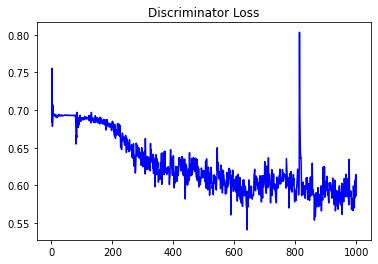

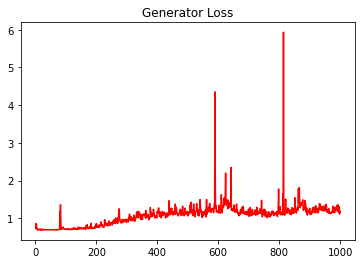

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.27982852037302125


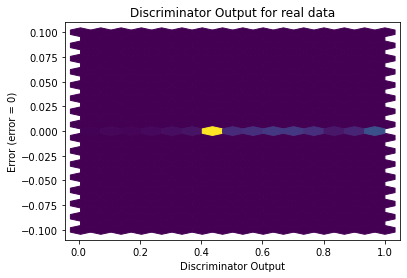

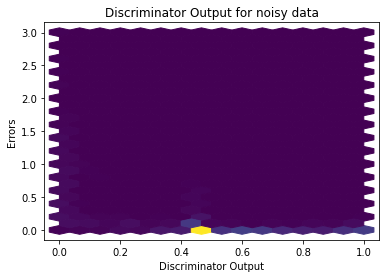

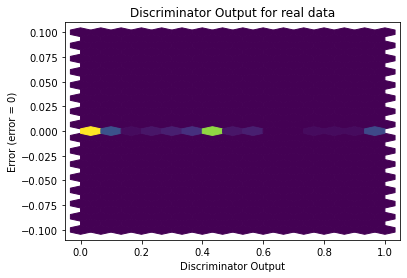

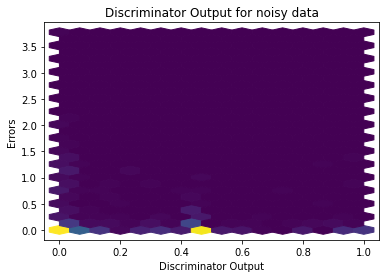

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

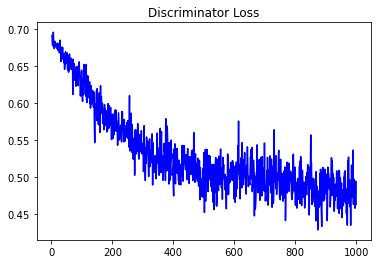

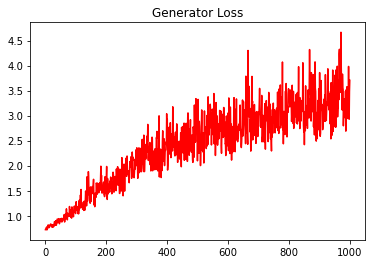

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.27544913621482386


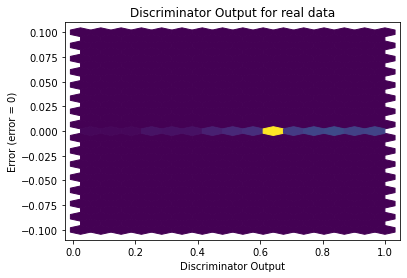

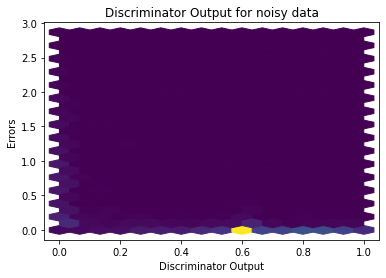

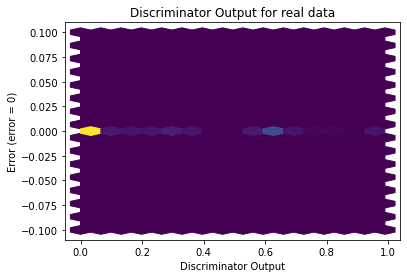

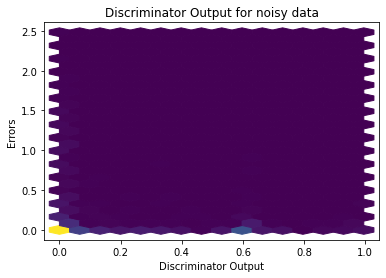

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


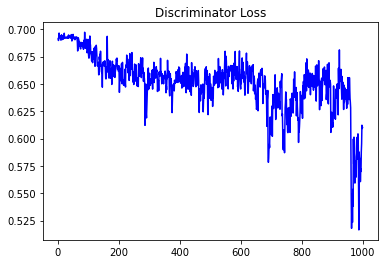

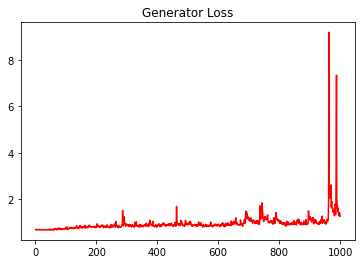

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.3089729870977702


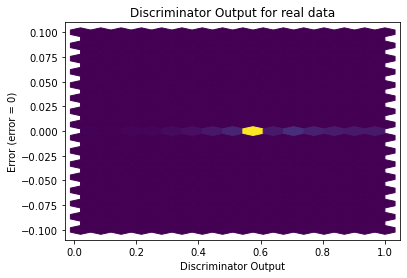

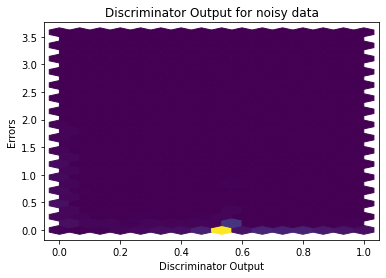

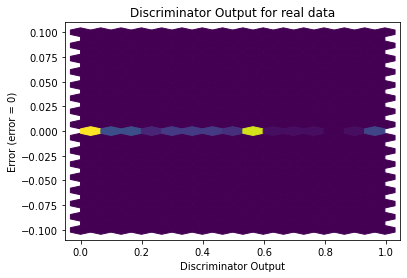

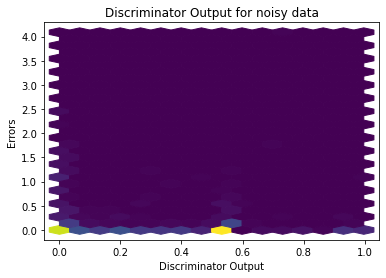

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


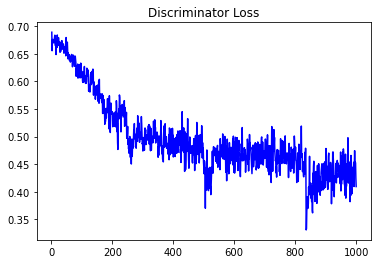

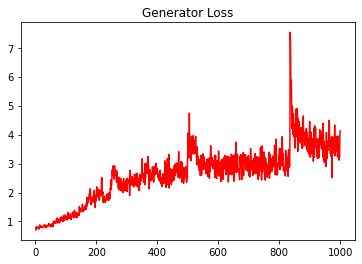

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.2915406828648502


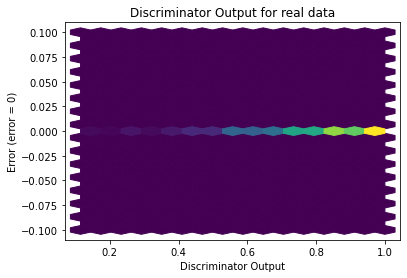

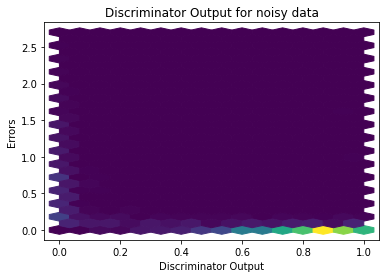

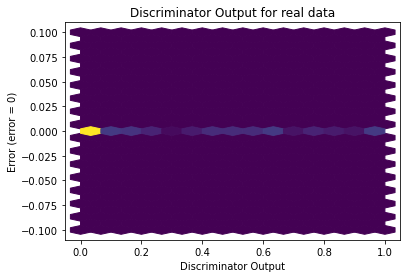

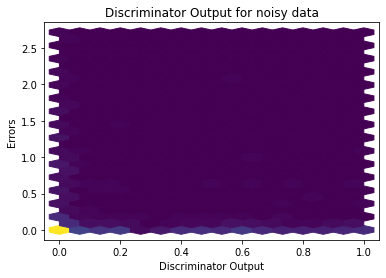

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9857]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8586]], requires_grad=True)
